In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [46]:
# Reading files with pandas library
lin_X = pd.read_csv("linearX.csv", header=None)
lin_Y = pd.read_csv("linearY.csv", header=None)
# storing X,Y data into numpy arrays
X = np.array(lin_X).reshape(-1)
Y = np.array(lin_Y).reshape(-1)
m = X.size

# Data Normalization
X_mean = np.mean(X)
X_std = np.std(X)
for i in range(len(X)):
    X[i] = (X[i] - X_mean) / X_std

X = np.array([X])
X= np.append(np.ones(X.shape), X, axis=0)

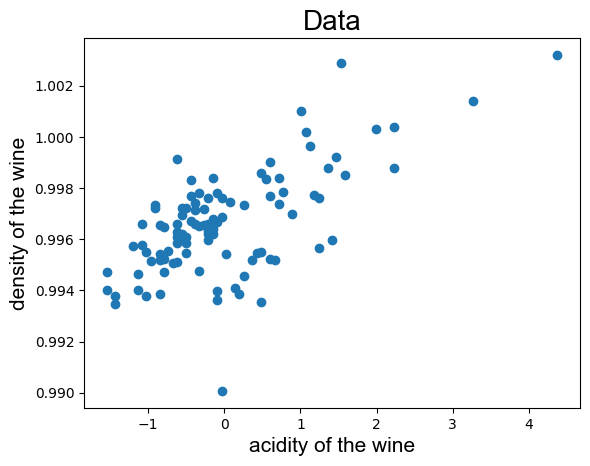

In [47]:
# Visualizing the Data on 2D plot
fig1 = plt.figure("Data Visualization")
plt.scatter(X[1,:],Y)
plt.title("Data", fontdict= {'fontname': 'Arial', 'fontsize': 20})
plt.xlabel("acidity of the wine", fontdict= {'fontname': 'Arial', 'fontsize': 15})
plt.ylabel("density of the wine",fontdict= {'fontname': 'Arial', 'fontsize': 15})

plt.show()

In [48]:
# Initializing Theta
Theta = np.zeros(2)
# Storing Theta and cost values
Theta_store = np.array([Theta])
cost_store = np.array([])
#Learning Rate
eta = 0.1

# Calculating the cost
def cost_fn(X,Theta,Y):
    err = Y - np.matmul(Theta, X)
    J_theta = (1/(2*m)) * np.sum((err)**2)
    return J_theta
        
# Calculating the updated theta using gradient descent
def grade_dec(X,Theta,Y):
    err2 = Y - np.matmul(Theta, X)
    sm = np.zeros(2)
    for j in range(m):
        sm += err2[j] * X[:,j]
    
    d_theta = (eta/m)*sm
    Theta += d_theta

# inital cost 
cost_store = np.append(cost_store, cost_fn(X, Theta, Y))


cost_store_pre = 0
count = 0
# we keep updating theta values untill the stopping criteria hits
while (abs(cost_store[-1] - cost_store_pre) >= 1e-11):
    grade_dec(X, Theta, Y)
    Theta_store = np.append(Theta_store, [Theta], axis=0)
    cost_store_pre = cost_store[-1]
    temp_cost = cost_fn(X,Theta,Y)
    cost_store = np.append(cost_store, temp_cost)
    count += 1

print("final Cost is =",cost_store[-1],"in iterations =",count)
print("Learning Rate: ", eta)
print("Theta_zero: ", Theta[0], "Theta_one: ", Theta[1])
print("stopping Criteria is: current cost - previous cost < ",1e-11)

final Cost is = 1.1948324082912589e-06 in iterations = 110
Learning Rate:  0.1
Theta_zero:  0.9966108699154312 Theta_one:  0.0013401836064368222
stopping Criteria is: current cost - previous cost <  1e-11


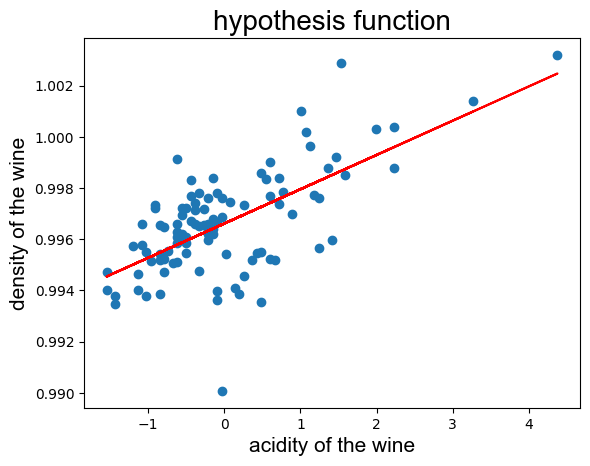

In [49]:
# ploting the hypothesis function
fig2 = plt.figure("hypothesis function")
plt.scatter(X[1,:],Y)
hypo = np.matmul(Theta, X)
plt.plot(X[1,:], hypo, '-r')
plt.title("hypothesis function", fontdict= {'fontname': 'Arial', 'fontsize': 20})
plt.xlabel("acidity of the wine", fontdict= {'fontname': 'Arial', 'fontsize': 15})
plt.ylabel("density of the wine",fontdict= {'fontname': 'Arial', 'fontsize': 15})
plt.show()


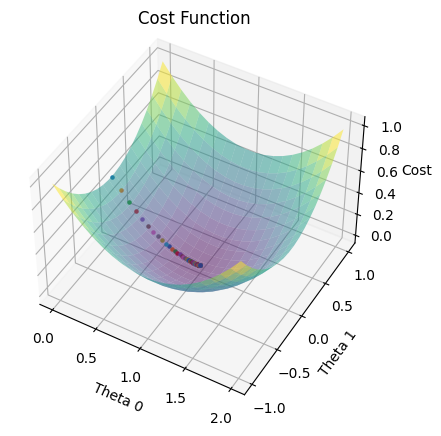

In [50]:
# 3D plot of cost function
t_0 = np.linspace(0, 2, 20)
t_1 = np.linspace(-1, 1, 20)
theta_0 = np.outer(t_0, np.ones(20))
theta_1 = np.transpose(np.outer(t_1, np.ones(20)))
cost_oneD = np.array([])

for k in range(t_0.size):
    for l in range(t_1.size):
        temp_theta = np.array([t_0[k], t_1[l]])
        cost_oneD = np.append(cost_oneD, cost_fn(X, temp_theta, Y))

cost_mat = cost_oneD.reshape((20,20))
fig3 = plt.figure("hypothesis function")
ax = plt.axes(projection ='3d')

ax.plot_surface(theta_0, theta_1, cost_mat, cmap ='viridis', alpha = 0.5)
ax.set_title('Cost Function')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel("Cost")

trace_t0 = Theta_store[:,0]
trace_t1 = Theta_store[:,1]
for i in range(trace_t0.size):
    ax.scatter(trace_t0[i], trace_t1[i], cost_store[i], marker='.')
ax.view_init(azim=-60, elev=45)

plt.show()


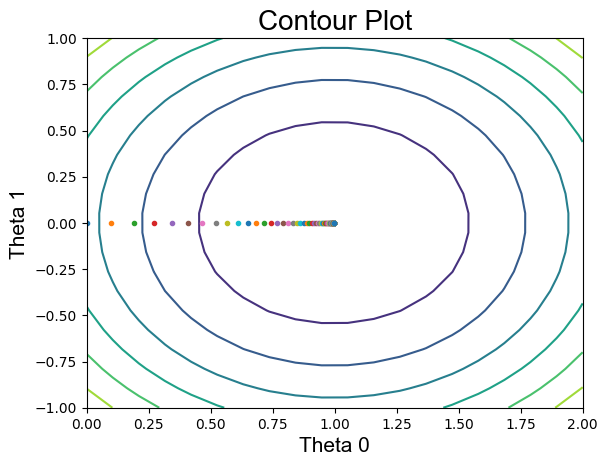

In [51]:
# contour plot
fig4 = plt.figure("hypothesis function")
plt.contour(theta_0, theta_1, cost_mat)
for i in range(trace_t0.size):
    plt.plot(trace_t0[i], trace_t1[i], marker="o", markersize=3)

plt.title("Contour Plot", fontdict= {'fontname': 'Arial', 'fontsize': 20})
plt.xlabel("Theta 0", fontdict= {'fontname': 'Arial', 'fontsize': 15})
plt.ylabel("Theta 1",fontdict= {'fontname': 'Arial', 'fontsize': 15})

plt.show()